Understanding the objective:

> Which schools have students that would benefit from outreach services and lead to a more diverse group of students taking the SHSAT and being accepted into New York City's Specialized High Schools.
                                                            - Chris Crawford, Kaggle Team

 

> Only a third (roughly) of eligible students take the SHSAT, and our goal is to drive more test takers (you can't get in if you don't sit for the test!). The education space is full of non-profits like ours with limited resources. So the research question is, given limited resources, where (at which schools) can you target your intervention efforts to make an impact on those participation numbers. The hypothesis is that using what we know about students/schools who do take the test, we can find similar students/schools and rank them on their likelihood/opportunity of converting into test-takers
                                                             - Max B, Dataset Creator



*Submissions for the Main Prize Track will be judged based on the following general criteria:*
* Performance - How well does the solution match schools and the needs of students to PASSNYC services? PASSNYC will not be able to live test every submission, so a strong entry will clearly articulate why it is effective at tackling the problem.
* Influential - The PASSNYC team wants to put the winning submissions to work quickly. Therefore a good entry will be easy to understand and will enable PASSNYC to convince stakeholders where services are needed the most.
* Shareable - PASSNYC works with over 60 partner organizations to offer services such as test preparation, tutoring, mentoring, extracurricular programs, educational consultants, community and student groups, trade associations, and more. Winning submissions will be able to provide convincing insights to a wide subset of these organizations. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools

In [17]:
def percent_to_int(df_in):
    for col in df_in.columns.values:
        if col.startswith("Percent") or col.endswith("%") or col.endswith("Rate"):
            df_in[col] = df_in[col].astype(np.object).str.replace('%', '').astype(float)
    return df_in

In [3]:
df_schools_raw = pd.read_csv('../../../input/2016 School Explorer.csv')
df_schools_raw = df_schools_raw[df_schools_raw['Grade High'] != '0K']
df_schools_raw = percent_to_int(df_schools_raw)
df_schools_raw['School Income Estimate'] = df_schools_raw['School Income Estimate'].astype(np.object).str.replace('$', '').str.replace(',', '').str.replace('.', '').astype(float)

df_schools_relevant_grade = df_schools_raw[df_schools_raw['Grade High'].astype(int) > 5]

df_schools.replace(np.NaN,0, inplace=True)
print("We have %d relevant schools and %d fields describing the school/ students"%(df_schools.shape))



df = pd.read_csv('../../../input/2017-2018 SHSAT Admissions Test Offers By Sending School.csv')
df = percent_to_int(df)
df.replace(np.NaN,0, inplace=True)

We have 626 relevant schools and 158 fields describing the school/ students


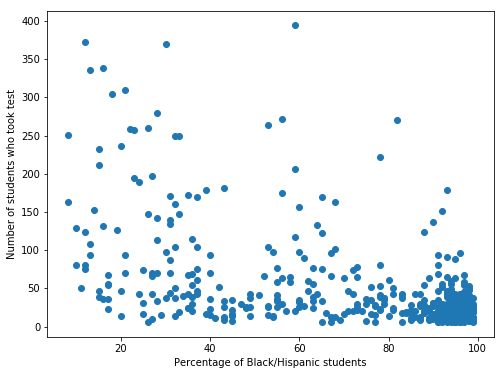

In [4]:
plt.figure(figsize=[8,6])
plt.scatter(df['Percentage of Black/Hispanic students'], df['Number of students who took test'])
plt.xlabel('Percentage of Black/Hispanic students')
plt.ylabel('Number of students who took test')

In [5]:

dfshort = df[df['Percentage of Black/Hispanic students']>80]
dfshort = dfshort[dfshort['Number of students who took test']<50]

In [6]:
dfshort.drop(['Borough','School Category','School Name'], axis=1, inplace=True)

dfmerged = pd.merge(df_schools, dfshort, how='outer', left_on='Location Code' ,right_on='School DBN')

In [7]:
dfmerged.shape

(647, 164)

In [8]:
len(set(df_schools['Location Code']).intersection(set(dfshort['School DBN'])))

328

In [9]:
len(set(df_schools['Location Code']).union(set(dfshort['School DBN'])))

647

In [10]:
dfmerged.dropna(inplace=True)

In [11]:
def grade_minority_percent_4s (df, grade, subject):
    out_field = ('Grade %d %s Minority 4s')%(grade, subject)
    num1 = ('Grade %d %s 4s - Black or African American')%(grade, subject)
    num2 = ('Grade %d %s 4s - Hispanic or Latino')%(grade, subject)
    den = ('Grade %d %s 4s - All Students')%(grade, subject)
    df = df[df[den].astype(int)>7]
    df[out_field] = (df[num1] + df[num2])/(df[den])
    grade_minority_df = df[df[out_field]>0.7]
    print(grade, subject, df.shape, grade_minority_df.shape, (grade_minority_df[num1] + grade_minority_df[num2]).mean(), df[num1].mean(), df[num2].mean())
    return df

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(5, 'ELA', (19, 165), (13, 165), 11.692307692307692, 6.684210526315789, 2.6842105263157894)
(5, 'Math', (33, 165), (21, 165), 14.761904761904763, 8.454545454545455, 4.575757575757576)
(6, 'ELA', (59, 165), (41, 165), 13.097560975609756, 7.406779661016949, 3.559322033898305)
(6, 'Math', (94, 165), (73, 165), 17.273972602739725, 8.393617021276595, 7.117021276595745)
(7, 'ELA', (38, 165), (26, 165), 11.846153846153847, 5.2105263157894735, 4.657894736842105)
(7, 'Math', (55, 165), (42, 165), 15.476190476190476, 6.545454545454546, 6.2727272727272725)
(8, 'ELA', (64, 165), (50, 165), 10.96, 4.40625, 5.28125)
(8, 'Math', (49, 165), (35, 165), 15.628571428571428, 5.755102040816326, 6.653061224489796)


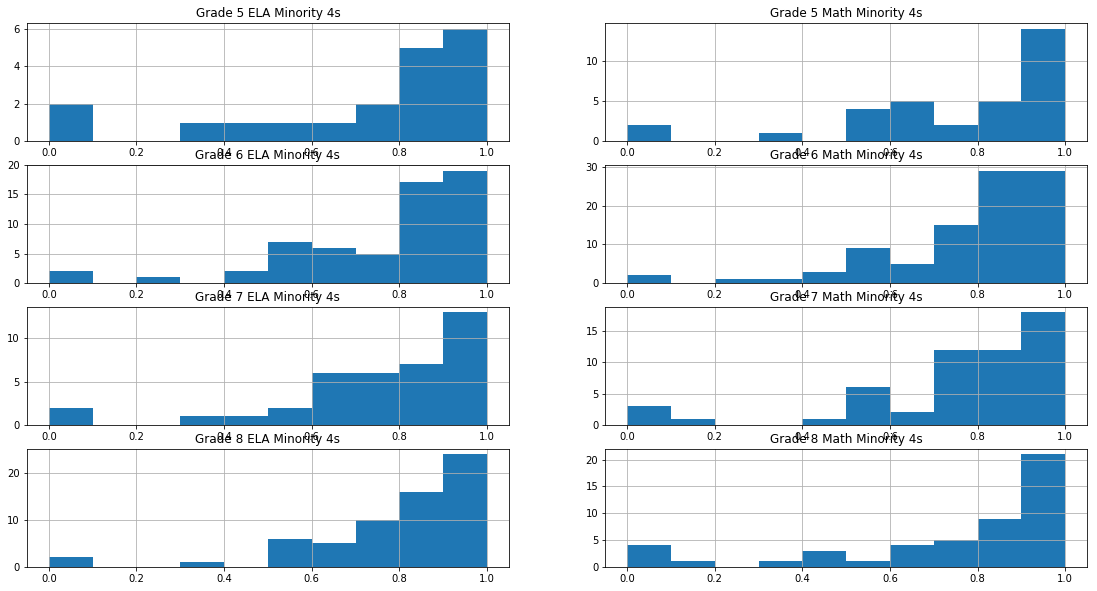

In [12]:
grades = [5,6,7,8]
subjects = ['ELA', 'Math']
i=1
plt.figure(figsize=[19,10])
df_all_schools = pd.DataFrame(columns=dfmerged.columns)
for grade,subject in itertools.product(grades, subjects):
    df_schools_tmp = grade_minority_percent_4s(dfmerged, grade, subject)
    
#     df_schools_tmp[]
    fname = ('Grade %d %s Minority 4s')%(grade, subject)
    plt.subplot(4,2,i)
    df_schools_tmp[fname].hist()
    df_help_schools = df_schools_tmp.copy(deep=True)
    df_schools_tmp.drop([fname], axis=1, inplace=True)
    plt.title(fname)
    df_all_schools = pd.concat([df_all_schools, df_schools_tmp])
    i += 1

In [13]:
df_help_schools = df_help_schools[df_help_schools['Grade 8 Math Minority 4s']>0.7]

(array([4., 2., 5., 5., 6., 4., 4., 1., 1., 3.]),
 array([ 6. , 10.3, 14.6, 18.9, 23.2, 27.5, 31.8, 36.1, 40.4, 44.7, 49. ]),
 <a list of 10 Patch objects>)

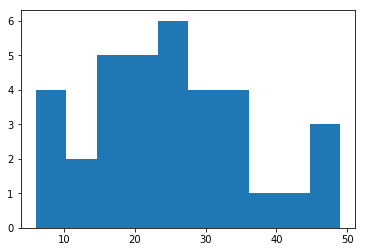

In [14]:
plt.hist(df_help_schools['Number of students who took test'])

(array([ 0.,  0.,  0.,  0.,  0., 35.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

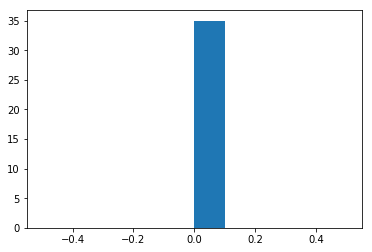

In [15]:
plt.hist(df_help_schools['Number of students who received offer'])

In [16]:
df_help_schools.shape

(35, 165)